# Logistics Regression

Diabetes Dataset from sklearn.datasets import load_diabetes

"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression # Logistics Regression
from sklearn.metrics import accuracy_score, confusion_matrix # Evaluation for Model
from sklearn.datasets import load_diabetes # diabetes dataset

In [2]:
df = load_diabetes()

In [3]:
diabetes = pd.DataFrame(df.data)

In [4]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diabetes.columns = df.feature_names

In [6]:
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [8]:
df.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [17]:
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [21]:
# Avg Glucose value of NonDiabetic People
diabetes.loc[diabetes["Outcome"]==0, "Glucose"].describe()

count    500.0000
mean     109.9800
std       26.1412
min        0.0000
25%       93.0000
50%      107.0000
75%      125.0000
max      197.0000
Name: Glucose, dtype: float64

In [22]:
# Avg Glucose value of Diabetic People
diabetes.loc[diabetes["Outcome"]==1, "Glucose"].describe()

count    268.000000
mean     141.257463
std       31.939622
min        0.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

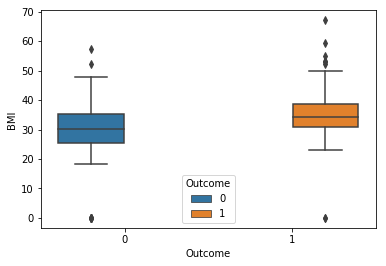

In [23]:
# BMI Vs Outcome
sns.boxplot(x = "Outcome", y = "BMI", data = diabetes, hue = "Outcome")

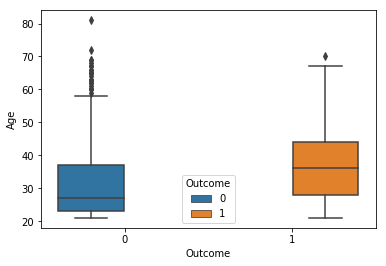

In [24]:
# Age Vs Outcome
sns.boxplot(x = "Outcome", y = "Age", data = diabetes, hue = "Outcome")

In [25]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
# Split the Data in X and Ys
x = diabetes.drop("Outcome", axis = 1)
y = diabetes.Outcome

In [30]:
# Machine 
lg = LogisticRegression()
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [31]:
# Build the Model
lg.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
pred_diabetes =lg.predict(xtest) 

In [57]:
acc = round(accuracy_score(ytest, pred_diabetes),3)*100

In [39]:
cf = confusion_matrix(ytest, pred_diabetes)

In [38]:
(119+36)/(119+36+37)

0.8072916666666666

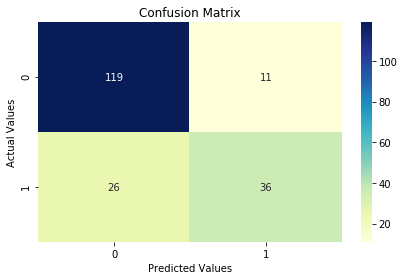

In [52]:
# Visualization of Confusion Matrix
ax = sns.heatmap(data = cf, cmap = "YlGnBu", annot=True, fmt = "2g")
ax.set(xlabel = "Predicted Values", ylabel = "Actual Values", title = "Confusion Matrix")
plt.tight_layout()

In [53]:
from sklearn.metrics import precision_score, recall_score

In [55]:
precision_score(ytest, pred_diabetes)*100

76.59574468085107

In [58]:
acc

80.7

In [59]:
recall_score(ytest, pred_diabetes)

0.5806451612903226

In [65]:
# regplot from sns - Checking the Linearity
def sigmoid_plot(x, title):
    sns.regplot(x, y = "Outcome", data = diabetes, logistic=True).set(title=title)

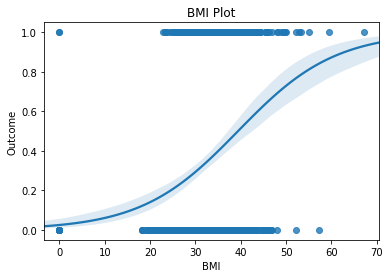

In [66]:
sigmoid_plot("BMI", "BMI Plot")

In [77]:
probability = lg.predict_proba(xtest)[::,1]
from sklearn.metrics import roc_curve, roc_auc_score

In [72]:
fpr, tpr,_ = roc_curve(ytest, probability)

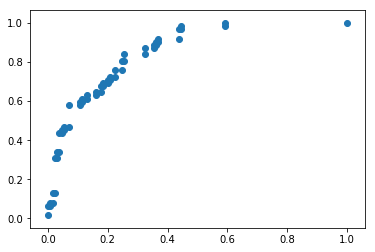

In [76]:
plt.scatter(fpr,tpr)

In [78]:
auc = roc_auc_score(ytest, probability)

TypeError: 'bool' object is not callable

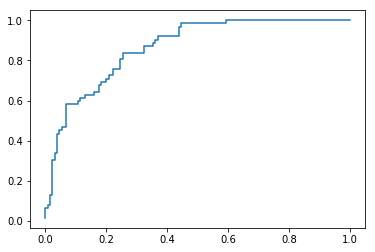

In [88]:
plt.plot(fpr, tpr, label = str(auc))
plt.legend()

In [89]:
auc

0.8641439205955335

### Titanic Machine Learning Competition from Kaggle

In [91]:
# Import the dataset
train = pd.read_csv("C://Users//Classroom//Documents//Titanictrain.csv")
test = pd.read_csv("C://Users//Classroom//Documents//Titanictest.csv")

In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,family_cat,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2,Small,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,Single,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,Single,Mr


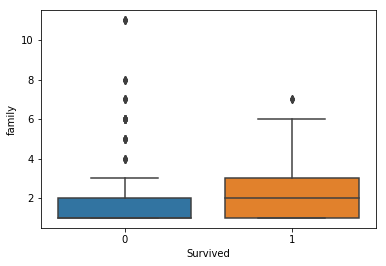

In [94]:
# Boxplot of Family
sns.boxplot(y = "family", x = "Survived", data = train)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


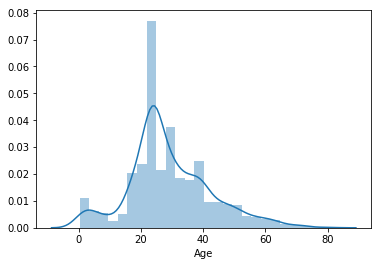

In [99]:
sns.distplot(train["Age"])

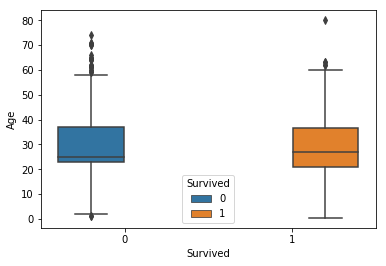

In [106]:
sns.boxplot(y = "Age", x = "Survived", data = train, hue = "Survived")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


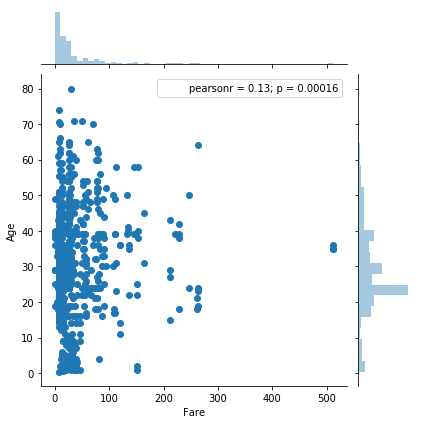

In [109]:
sns.jointplot(y = "Age", x = "Fare", data = train)

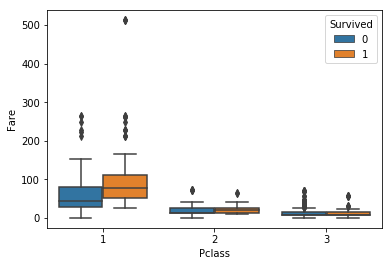

In [110]:
# Fare vs Class
sns.boxplot(x = "Pclass", y = "Fare", data = train, hue = "Survived")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


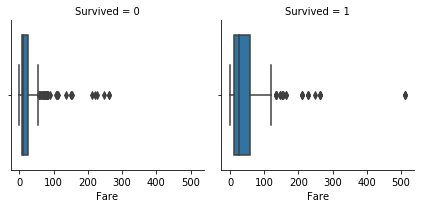

In [114]:
g = sns.FacetGrid(train, col="Survived")
g.map(sns.boxplot, "Fare")


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

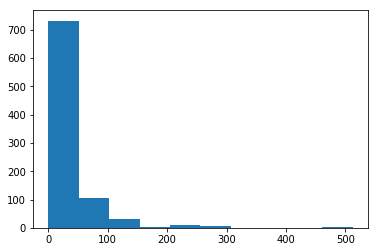

In [115]:
# Histogram of Fare
plt.hist(train.Fare) # Fare is skewed

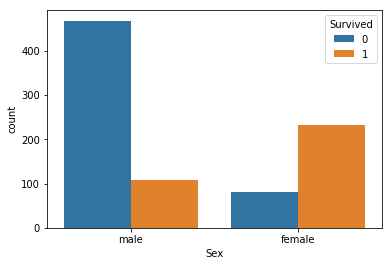

In [118]:
# Females Survived whereas the males died
sns.countplot(x = "Sex", data=train, hue = "Survived")

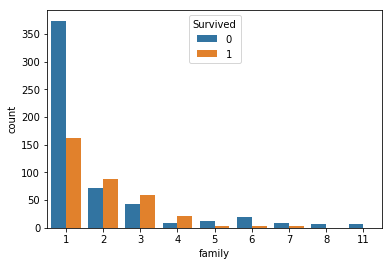

In [119]:
# Females Survived whereas the males died - Uptill 03 Higher Chance of Survival
sns.countplot(x = "family", data=train, hue = "Survived")

In [121]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family', 'family_cat',
       'Titles'],
      dtype='object')

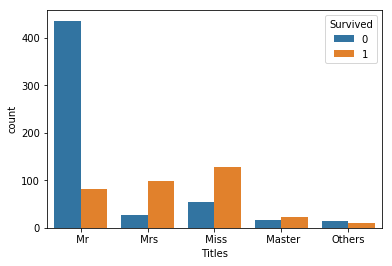

In [122]:
# Females Survived whereas the males died - Uptill 03 Higher Chance of Survival
sns.countplot(x = "Titles", data=train, hue = "Survived") # Better Survival for Miss, Mrs and Master

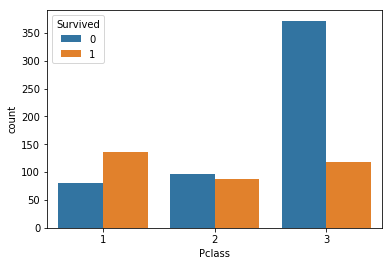

In [124]:
#P Class Survival Scenario - Class 01 and Class 02 have bright survival ratio
sns.countplot(x = "Pclass", data=train, hue = "Survived") # Better Survival for Miss, Mrs and M

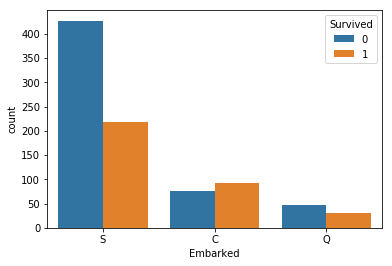

In [125]:
#Cherbourg - 55% People Survived
sns.countplot(x = "Embarked", data=train, hue = "Survived")


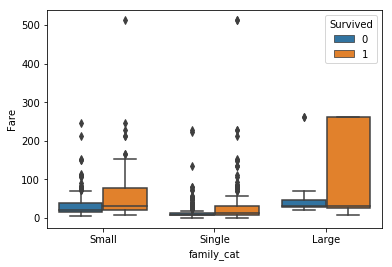

In [128]:
sns.boxplot(x = "family_cat", y = "Fare", hue="Survived", data = train)

# Logistic Regression Model on Titanic

In [132]:
# get dummies
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family', 'family_cat',
       'Titles'],
      dtype='object')

In [134]:
# Drop the Columns which are not to be used with the Model
train = train.drop('PassengerId', axis = 1)
train = train.drop('Name', axis = 1)
train = train.drop('Ticket', axis = 1)
train = train.drop('Cabin', axis = 1)

In [ ]:
test = test.drop('Name', axis = 1)
test = test.drop('Ticket', axis = 1)
test = test.drop('Cabin', axis = 1)

In [136]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_cat,Titles
0,0,3,male,22.0,1,0,7.2500,S,2,Small,Mr
1,1,1,female,38.0,1,0,71.2833,C,2,Small,Mrs
2,1,3,female,26.0,0,0,7.9250,S,1,Single,Miss
3,1,1,female,35.0,1,0,53.1000,S,2,Small,Mrs
4,0,3,male,35.0,0,0,8.0500,S,1,Single,Mr


In [137]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_cat,titles
0,892,3,male,34.5,0,0,7.8292,Q,1,Single,Mr
1,893,3,female,47.0,1,0,7.0000,S,2,Small,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,1,Single,Mr
3,895,3,male,27.0,0,0,8.6625,S,1,Single,Mr
4,896,3,female,22.0,1,1,12.2875,S,3,Small,Mrs


In [138]:
newtrain = pd.get_dummies(train)
newtest = pd.get_dummies(test)

In [139]:
newtrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,family_cat_Large,family_cat_Single,family_cat_Small,Titles_ Master,Titles_ Miss,Titles_ Mr,Titles_ Mrs,Titles_Others
0,0,3,22.0,1,0,7.2500,2,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,2,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1,0,1,0,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,2,1,0,0,0,1,0,0,1,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1,0,1,0,0,0,1,0,0


In [147]:
ID = newtest.PassengerId
newtest = newtest.drop("PassengerId", axis = 1)

In [142]:
# Apply the Model
x = newtrain.drop("Survived" , axis = 1)
y = newtrain.Survived

In [143]:
# Logistics Model
lg = LogisticRegression()

In [148]:
lg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
pred_titanic = lg.predict(newtest)

In [154]:
accuracy_score(y, lg.predict(x))

0.8316498316498316

In [181]:
newtest["Survived"]=pred_titanic # Created a New Column Called Survived in Test Data

In [200]:
# Create the Data for Submission
PassengerId = ID.values.tolist()
Survived = newtest["Survived"].values.tolist()
d = {"PassengerId":PassengerId, "Survived":Survived}

In [201]:
solution = pd.DataFrame(d)

In [202]:
solution.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [203]:
# Kaggle Accuracy - 0.78468
solution.to_csv("C://Users//Classroom//Documents//Bagging.csv", index = False)

In [165]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [195]:
ada = AdaBoostClassifier(n_estimators=100)

In [196]:
ada.fit(x, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [197]:
newtest = newtest.drop("Survived", axis = 1)

In [198]:
pred_ada = ada.predict(newtest)

In [187]:
bag = BaggingClassifier()

In [188]:
bag.fit(x,y)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [189]:
pred_bagg = bag.predict(newtest)

In [190]:
newtest["Survived"]=pred_bagg

In [199]:
newtest["Survived"]=pred_ada